<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/02wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

{{<video https://youtu.be/playlist?list=PLQqh36zP38-xrw8e2pQ1KqKFb-i3lVtsI&si=dDAjAteouM7Y30HU >}}

# 2. Imports

In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np

# 3. 회귀분석 예제의 다양한 구현

## A. Data

In [2]:
temp = [-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.6632]
sales= [-8.5420, -6.5767, -5.9496, -4.4794, -4.2516, -3.1326, -4.0239, -4.1862,
        -3.3403, -2.2027, -2.0262, -2.5619, -1.3353, -2.0466, -0.4664, -1.3513,
        -1.6472, -0.1089, -0.3071, -0.6299, -0.0438,  0.4163,  0.4166, -0.0943,
         0.2662,  0.4591,  0.8905,  0.8998,  0.6314,  1.3845,  0.8085,  1.2594,
         1.1211,  1.9232,  1.0619,  1.3552,  2.1161,  1.1437,  1.6245,  1.7639,
         1.6022,  1.7465,  0.9830,  1.7824,  2.1116,  2.8621,  2.1165,  1.5226,
         2.5572,  2.8361,  3.3956,  2.0679,  2.8140,  3.4852,  3.6059,  2.5966,
         2.8854,  3.9173,  3.6527,  4.1029,  4.3125,  3.4026,  3.2180,  4.5686,
         4.3772,  4.3075,  4.4895,  4.4827,  5.3170,  5.4987,  5.4632,  6.0328,
         5.2842,  5.0539,  5.4538,  6.0337,  5.7250,  5.7587,  6.2020,  6.5992,
         6.4621,  6.5140,  6.6846,  7.3497,  8.0909,  7.0794,  6.8667,  7.4229,
         7.2544,  7.1967,  9.5006,  9.0339,  7.4887,  9.0759, 11.0946, 10.3260,
        12.2665, 13.0983, 12.5468, 13.8340]
x = torch.tensor(temp).reshape(-1,1)
ones = torch.ones(100).reshape(-1,1)
X = torch.concat([ones,x],axis=1)
y = torch.tensor(sales).reshape(-1,1)

## B. 파이토치를 이용한 학습 

`-` 외우세여

In [3]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30):
    ## step1 yhat Prediction
    yhat = X@What
    ## step2 loss (초기 선이 적합한지 기준)
    loss = torch.sum((y-yhat)**2)       # SSE : Sum of Square error
    ## step3 미분  (업데이트를 위한 준비)
    loss.backward()
    # print(What.grad)
    ## step4 업데이트
    What.data = What.data -0.001 * What.grad
    What.grad = None    # 왜 None으로 초기화 다시 해야하는지?    
    ## step1 반복

`-` 결과 시각화 

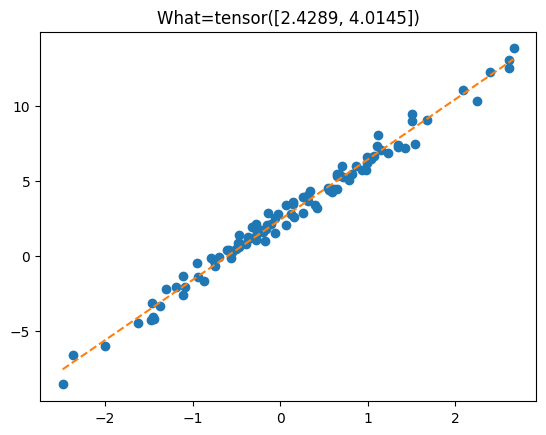

In [4]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

## C. Step2의 수정

`-` 수정된 코드  
- loss_fn = torch.nn.MSELoss() 의 등장  

여기서 learning rate가 기존 **0.001** 에서 **0.1** 으로 대폭? 커졌다. SSE에서 MSE로 가면서, loss가 평균화로 작아지는 것에 대해 기울기 grad 값도 같이 작아져서, update가 더뎌지는걸 learning rate를 높여서 보상? 했다고 생각하면 될 듯.

In [5]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    ## step 1 : Yhat prediction
    yhat = X@What 
    ## step 2 : Loss definition
    #loss = torch.sum((y-yhat)**2)/100
    loss = loss_fn(yhat,y)                  # 여기서는 큰 상관없지만 습관적으로 yhat을 먼저넣는 연습을 하자!!
    ## step 3 : Calculate gradient
    loss.backward()
    ## step 4 : Update
    What.data = What.data -0.1*What.grad    # 여기서 learning rate가 기존 0.001 에서 0.1 으로 대폭? 커졌다. SSE에서 MSE로 가면서, loss가 평균화로 작아지는 것에 대해 기울기 grad 값도 같이 작아져서, update가 더뎌지는걸 learning rate를 높여서 보상? 했다고 생각하면 될 듯.
    What.grad =None

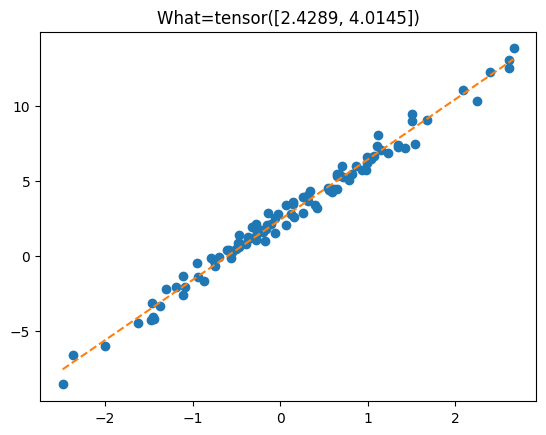

In [6]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

여기서 learning rate가 **기존 0.001** 으로 하면 **30 epoch**으로는 택도 없다. **3000** 정도는 되어야 한다.

In [7]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
loss_fn = torch.nn.MSELoss()
for epoc in range(3000):
    ## step 1 : Yhat prediction
    yhat = X@What 
    ## step 2 : Loss definition
    #loss = torch.sum((y-yhat)**2)/100
    loss = loss_fn(yhat,y)                  # 여기서는 큰 상관없지만 습관적으로 yhat을 먼저넣는 연습을 하자!!
    ## step 3 : Calculate gradient
    loss.backward()
    ## step 4 : Update
    What.data = What.data -0.001*What.grad    # 여기서 learning rate가 기존 0.001 으로 하면 30 epoch으로는 택도 없다. 3000 정도는 되어야 한다.
    What.grad =None

`-` 결과확인 

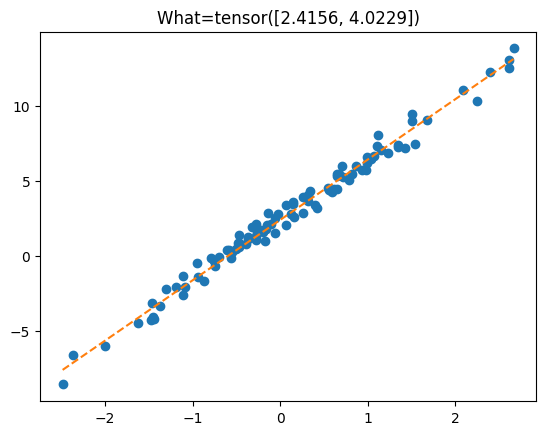

In [8]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

## D. Step1의 수정 -- `net`의 이용

`-` net 오브젝트란? 
net = torch.nn.Linear(
    in_features=int(2),          # input의 차원 , X=(n:데이터 개수,2:차원), 즉 x(n,2)에서 n이 아닌 2를 넣어야되네.     # 02wk-2 강의 18:42 에서 이유 설명
    out_features=int(1),         # output의 차원    y=(2,1) , 즉 y(n,1) 에서 1을 넣어야되네                       # 02wk-2 강의 19:16 에서 이유 설명 .  쉽게 말해 w0와 w1으로 y를 찾고싶은거니까!
    bias=True (default)     # bias
)

In [9]:
torch.nn.Linear?

Init signature:
torch.nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`.

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(*, H_{in})` where :math:`*` means any number of
      dimensions including none and :math:`H_{in} = \text{in\_features}`.
    - Output: :math:`(*, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :

원래 yhat을 이런식으로 구했는데 ~

In [10]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
(X@What.data)[:5]

tensor([[-29.8210],
        [-28.6210],
        [-24.9730],
        [-21.2390],
        [-19.7920]])

이런식으로도 구할수 있음!

In [11]:
net = torch.nn.Linear(
    in_features=2,      # w0,w1
    out_features=1,     # y
    bias=False          # already w0 exists
)

torch.nn.Linear 으로 생성된 net 객체는 __callable__ 하므로 () 호출자 사용이 가능

In [12]:
dir(net)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_per

In [13]:
net.weight.data = torch.tensor([[-5.0,  10.0]]) # in_features와 동일한 입력인자 개수, 여기선 column 벡터가 아닌 row 벡터를 넣어줘야 한다.
net.weight      # w0 : -5 , w1 : 10 , What의 Transform 형태로 정의됨

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [14]:
net(X)          # 입력 X 가 네트워크 net을 타고 yhat이 되는 과정

tensor([[-29.8210],
        [-28.6210],
        [-24.9730],
        [-21.2390],
        [-19.7920],
        [-19.6350],
        [-19.5090],
        [-19.4350],
        [-18.7220],
        [-18.0790],
        [-16.9040],
        [-16.0920],
        [-16.0540],
        [-15.8750],
        [-14.4690],
        [-14.3190],
        [-13.6430],
        [-12.8580],
        [-12.5490],
        [-12.4210],
        [-11.9480],
        [-11.1030],
        [-10.8300],
        [-10.6210],
        [-10.5060],
        [-10.0580],
        [ -9.8060],
        [ -9.7380],
        [ -9.7100],
        [ -9.6760],
        [ -8.8740],
        [ -8.7190],
        [ -8.6880],
        [ -8.1590],
        [ -7.7750],
        [ -7.7720],
        [ -7.7340],
        [ -7.7210],
        [ -7.6680],
        [ -7.1550],
        [ -7.0000],
        [ -6.8160],
        [ -6.7080],
        [ -6.5650],
        [ -6.4480],
        [ -6.3610],
        [ -6.0570],
        [ -5.6030],
        [ -5.5590],
        [ -5.2140],


In [15]:
net(X)[:5]

tensor([[-29.8210],
        [-28.6210],
        [-24.9730],
        [-21.2390],
        [-19.7920]], grad_fn=<SliceBackward0>)

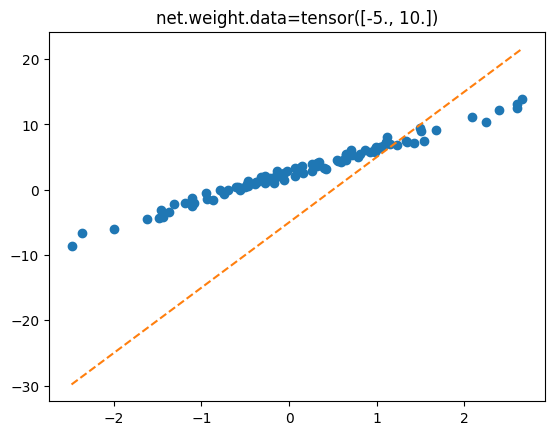

In [16]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.title(f'net.weight.data={net.weight.data.reshape(-1)}');

`-` 학습 

구버전

In [17]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    ## step 1 : Yhat prediction
    yhat = X@What 
    ## step 2 : Loss definition
    #loss = torch.sum((y-yhat)**2)/100
    loss = loss_fn(yhat,y)                  # 여기서는 큰 상관없지만 습관적으로 yhat을 먼저넣는 연습을 하자!!
    ## step 3 : Calculate gradient
    loss.backward()
    ## step 4 : Update
    What.data = What.data -0.1*What.grad    # 여기서 learning rate가 기존 0.001 에서 0.1 으로 대폭? 커졌다. SSE에서 MSE로 가면서, loss가 평균화로 작아지는 것에 대해 기울기 grad 값도 같이 작아져서, update가 더뎌지는걸 learning rate를 높여서 보상? 했다고 생각하면 될 듯.
    What.grad =None

신버전  
- new(X) = X@What
- net.weight = What  

In [18]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]]) # 이때 차원이 column 이 아닌 row 인걸 주의해라.
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    net.weight.data = net.weight.data - 0.1 * net.weight.grad
    net.weight.grad = None

`-` 결과확인

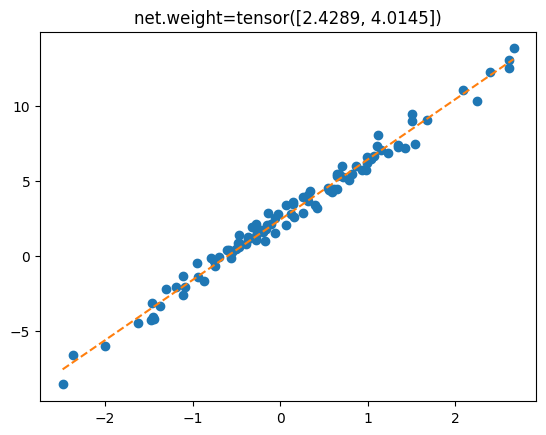

In [19]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

## E. Step4의 수정 -- optimizer의 이용 

***기존코드의 에폭별분해***

`-` 준비과정

In [20]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()

`-` 에폭별분해 

(미분전) -- step1~2 완료

In [21]:
yhat = net(X)
loss = loss_fn(yhat,y)

In [22]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-5., 10.]])
미분값 = None


(미분후, 업데이트 진행전) -- step3 완료

In [23]:
loss.backward()

In [24]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-5., 10.]])
미분값 = tensor([[-13.4225,  11.8892]])


(업데이트 진행후) -- step4 의 첫째줄 완료 

In [25]:
net.weight.data = net.weight.data - 0.1 * net.weight.grad

In [26]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')    # 미분값은 그대로 있는데 weight값은 반영됨

파라메터 = tensor([[-3.6578,  8.8111]])
미분값 = tensor([[-13.4225,  11.8892]])


(업데이트 완료 후 초기화까지 끝냄) -- step4 의 두번째줄 완료 

In [27]:
net.weight.grad = None

In [28]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-3.6578,  8.8111]])
미분값 = None


***새로운코드의 에폭별분해***

`-` 준비과정 -- 옵티마이저라는 오브젝트를 셋팅한다!

In [29]:
torch.optim.SGD?

Init signature:
torch.optim.SGD(
    params,
    lr=0.001,
    momentum=0,
    dampening=0,
    weight_decay=0,
    nesterov=False,
    *,
    maximize: bool = False,
    foreach: Union[bool, NoneType] = None,
    differentiable: bool = False,
    fused: Union[bool, NoneType] = None,
)
Docstring:     
Implements stochastic gradient descent (optionally with momentum).

.. math::
   \begin{aligned}
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: f(\theta)
            \text{ (objective)}, \: \lambda \text{ (weight decay)},                          \\
        &\hspace{13mm} \:\mu \text{ (momentum)}, \:\tau \text{ (dampening)},
        \:\textit{ nesterov,}\:\textit{ maximize}                                     \\[-1.ex]
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{for} \: t=1 \: \textbf{to} 

In [30]:
# step1인 yhat을 위한 사전준비 , 
# What = torch.tensor([[-5],[10]] grad true), yhat=X@What -> yhat=net(X)
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2 loss를 위한 사전준비
# loss = loss_fn(yhat,y)
loss_fn = torch.nn.MSELoss()
# step 4 update를 위한 사전준비 
optimizr = torch.optim.SGD(params=net.parameters(),lr=0.1)  #  net.parameters() == tensor([[-5., 10.]], requires_grad=True)

net.parameters() 를 출력해보면 generator object 라고 뜨면서 메모리 주소가 뜬다..

In [31]:
net.parameters()

<generator object Module.parameters at 0x768056f264a0>

참고로 generator object  는 list 로 감싸면 값을 출력할 수 있다고 한다.

In [32]:
list(net.parameters())

[Parameter containing:
 tensor([[-5., 10.]], requires_grad=True)]

In [33]:
optimizr

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

`-` 에폭별분해 

(미분전) -- step1~2 완료

In [34]:
yhat = net(X)
loss = loss_fn(yhat,y)

In [35]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-5., 10.]])
미분값 = None


(미분후, 업데이트 진행전) -- step3 완료

In [36]:
loss.backward()

In [37]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-5., 10.]])
미분값 = tensor([[-13.4225,  11.8892]])


(업데이트 진행후) -- step4 의 첫째줄 완료 

In [38]:
#net.weight.data = net.weight.data - 0.1 * net.weight.grad
optimizr.step()

In [39]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-3.6578,  8.8111]])
미분값 = tensor([[-13.4225,  11.8892]])


(업데이트 완료 후 초기화까지 끝냄) -- step4 의 두번째줄 완료 

In [40]:
#net.weight.grad = None
optimizr.zero_grad()

In [41]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-3.6578,  8.8111]])
미분값 = None


***최종코드***

`-` 학습 

In [42]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
# net.weight.data 의 차원은 (out_features,in_features)
net.weight.data = torch.tensor([[-5.0,  10.0]]) # 차원 조심, row 벡터로 할 것


# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [43]:
X.shape

torch.Size([100, 2])

In [44]:
optimizr.step?

Signature: optimizr.step(closure=None)
Docstring:
Performs a single optimization step.

Args:
    closure (Callable, optional): A closure that reevaluates the model
        and returns the loss.
File:      ~/.conda/envs/dl2024/lib/python3.8/site-packages/torch/optim/sgd.py
Type:      method

`-` 결과확인 

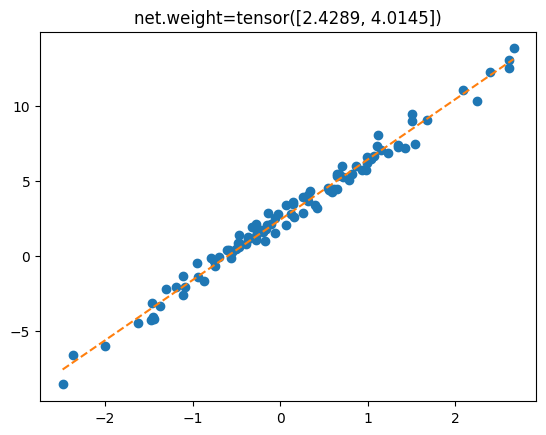

In [45]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');